# **Import Libraries and Data**

In [9]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import TheilSenRegressor, Ridge
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

In [ ]:
df.head(10)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.2875,1.0750,0.3625,19.433582,8.306404,4.309124,6.662133,9.0
1,1,F,1.5500,1.2125,0.4250,33.877653,13.706983,6.676307,10.064072,14.0
2,2,M,1.3875,1.0625,0.3500,23.388337,9.993199,5.556502,5.811648,11.0
3,3,F,1.4375,1.1250,0.4375,27.499015,11.254751,5.329706,7.937860,22.0
4,4,M,1.5250,1.2250,0.4250,32.460178,13.919605,7.569317,8.788345,10.0
5,5,F,1.5500,1.2750,0.5000,33.268138,12.388732,8.604073,11.056305,12.0
6,6,M,1.5375,1.2125,0.4125,33.409886,14.047177,8.193005,8.448151,12.0
7,7,M,1.3000,1.0250,0.3250,19.745427,6.761356,4.635143,5.244657,14.0
8,8,M,1.5250,1.1750,0.4750,33.126391,17.619214,7.385045,8.079607,10.0
9,9,I,0.8875,0.6750,0.2250,6.392812,2.820775,1.190679,1.403300,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.311821,1.020134,0.346236,23.056144,9.955010,4.978165,6.617204,9.951667
std,4330.271354,0.287776,0.237408,0.090561,12.519632,5.583084,2.768335,3.532174,3.226643
min,0.000000,0.287500,0.000000,0.000000,0.297670,0.127573,0.070874,0.085048,1.000000
25%,3749.750000,1.150000,0.887500,0.287500,13.139993,5.669900,2.792426,3.827183,8.000000
50%,7499.500000,1.375000,1.075000,0.362500,23.437949,9.823102,4.861939,6.803880,10.000000
75%,11249.250000,1.525000,1.200000,0.412500,31.992411,13.891255,6.917278,9.029316,11.000000
max,14999.000000,1.987500,1.712500,0.700000,75.324622,42.184056,17.009700,25.089308,29.000000


# **Data Exploration**

In [ ]:
df.isnull().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [ ]:
df.drop(columns=['id'], inplace=True)

In [ ]:
test.drop(columns=['id'], inplace=True)

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
test['Sex'] = le.transform(test['Sex'])

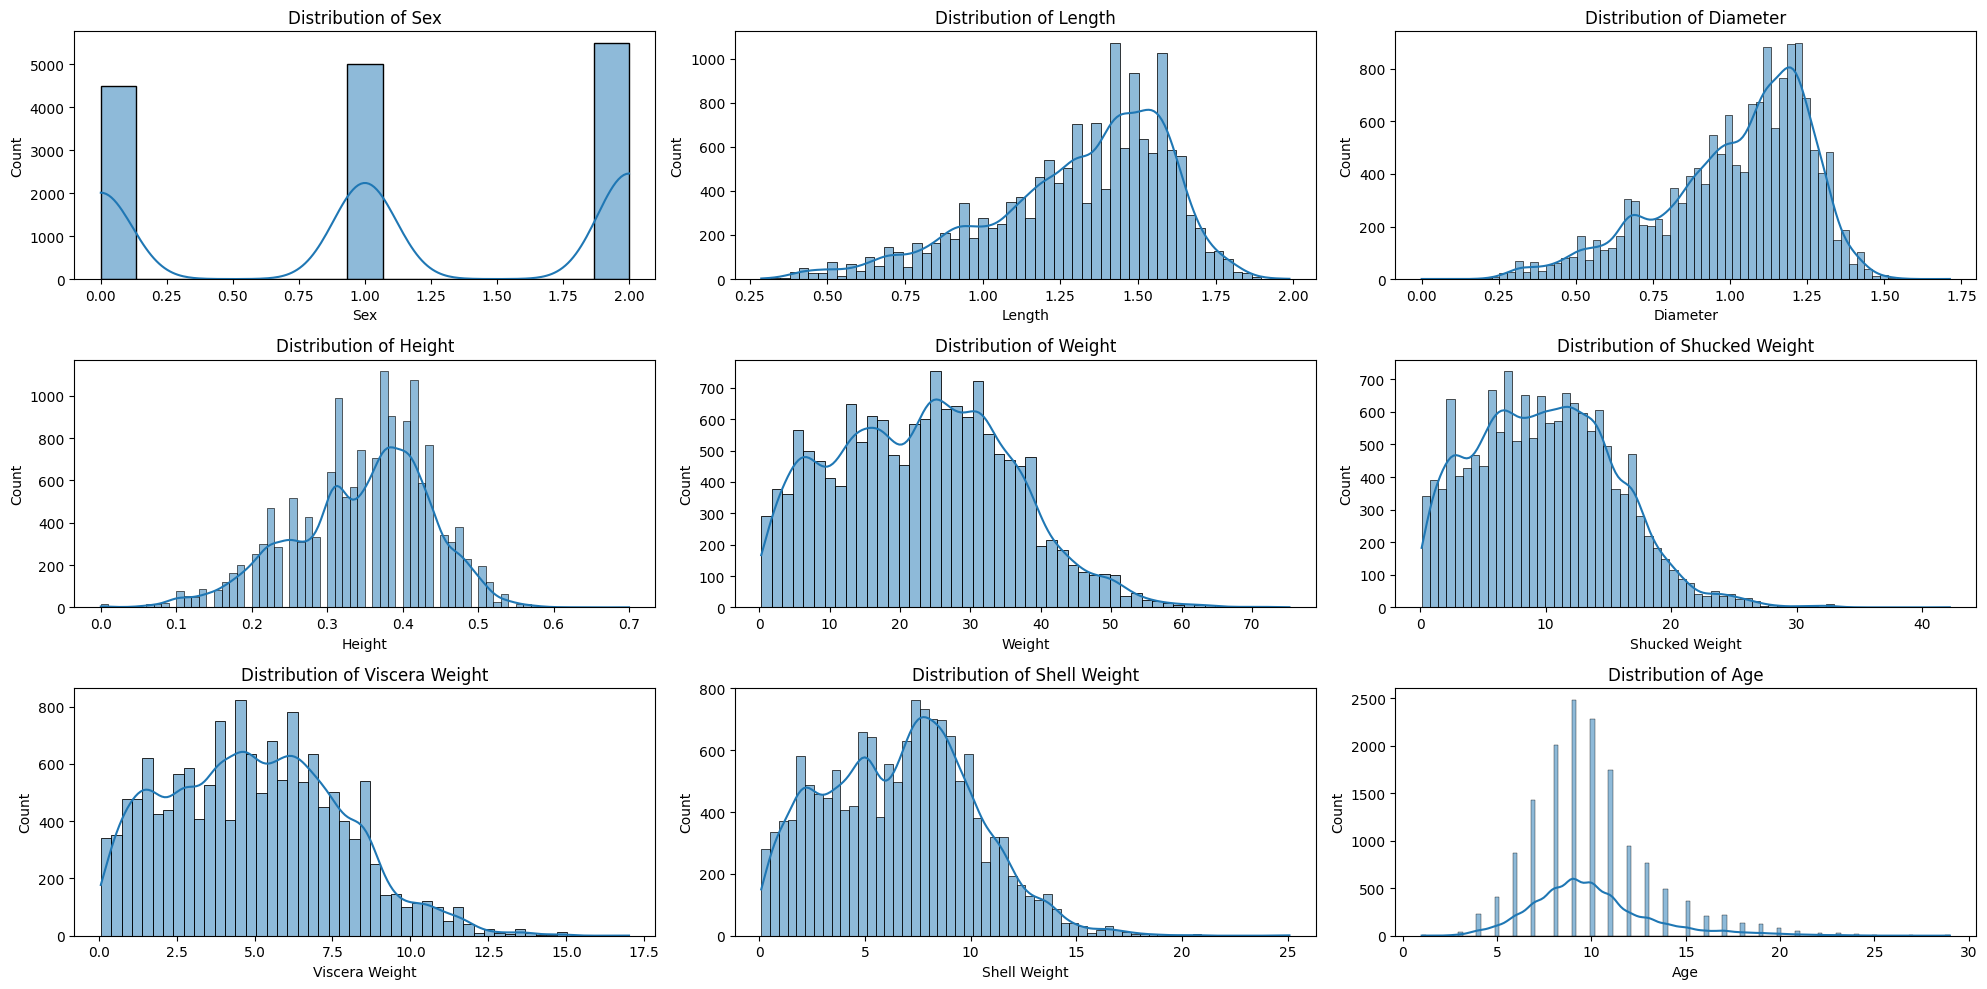

In [ ]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

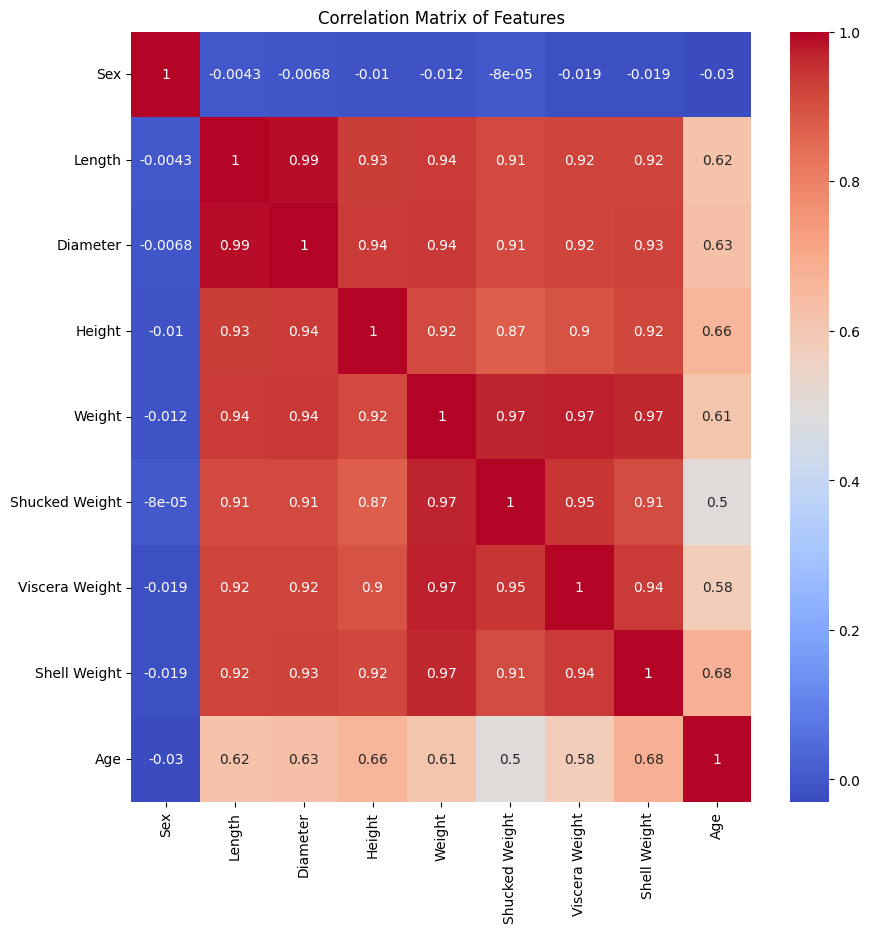

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

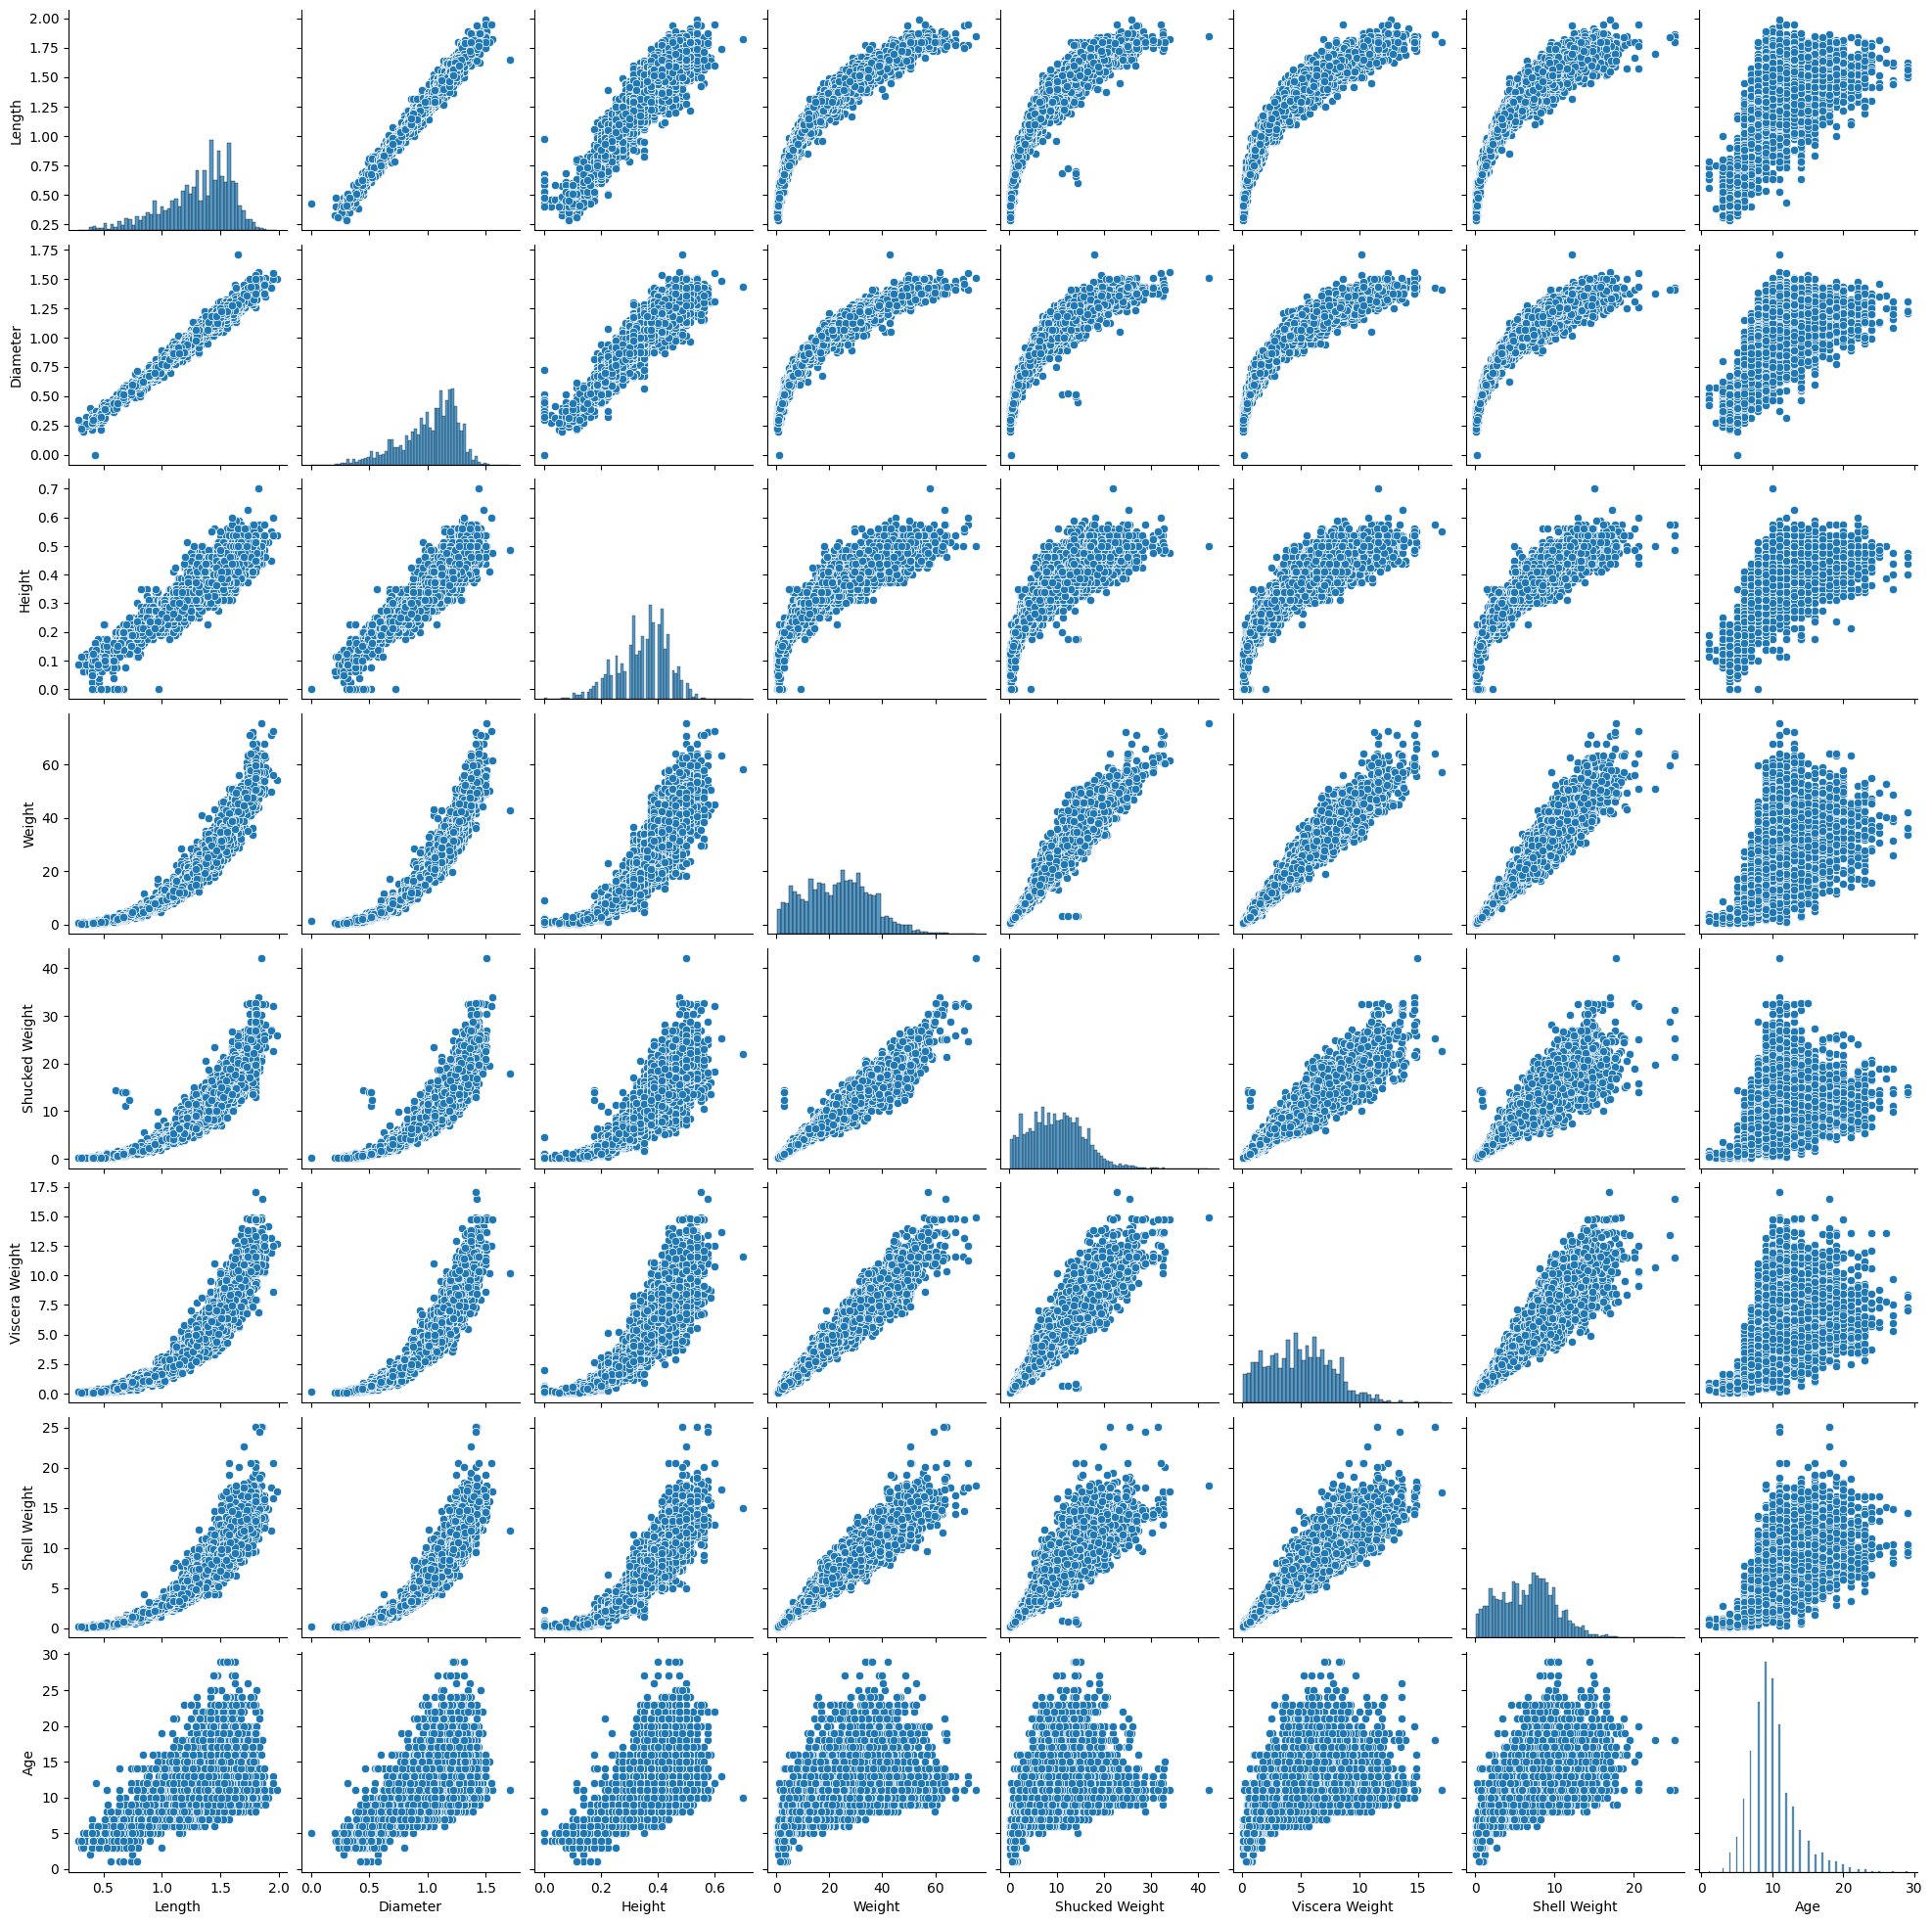

In [ ]:
sns.pairplot(df.drop('Sex', axis=1))
plt.show()

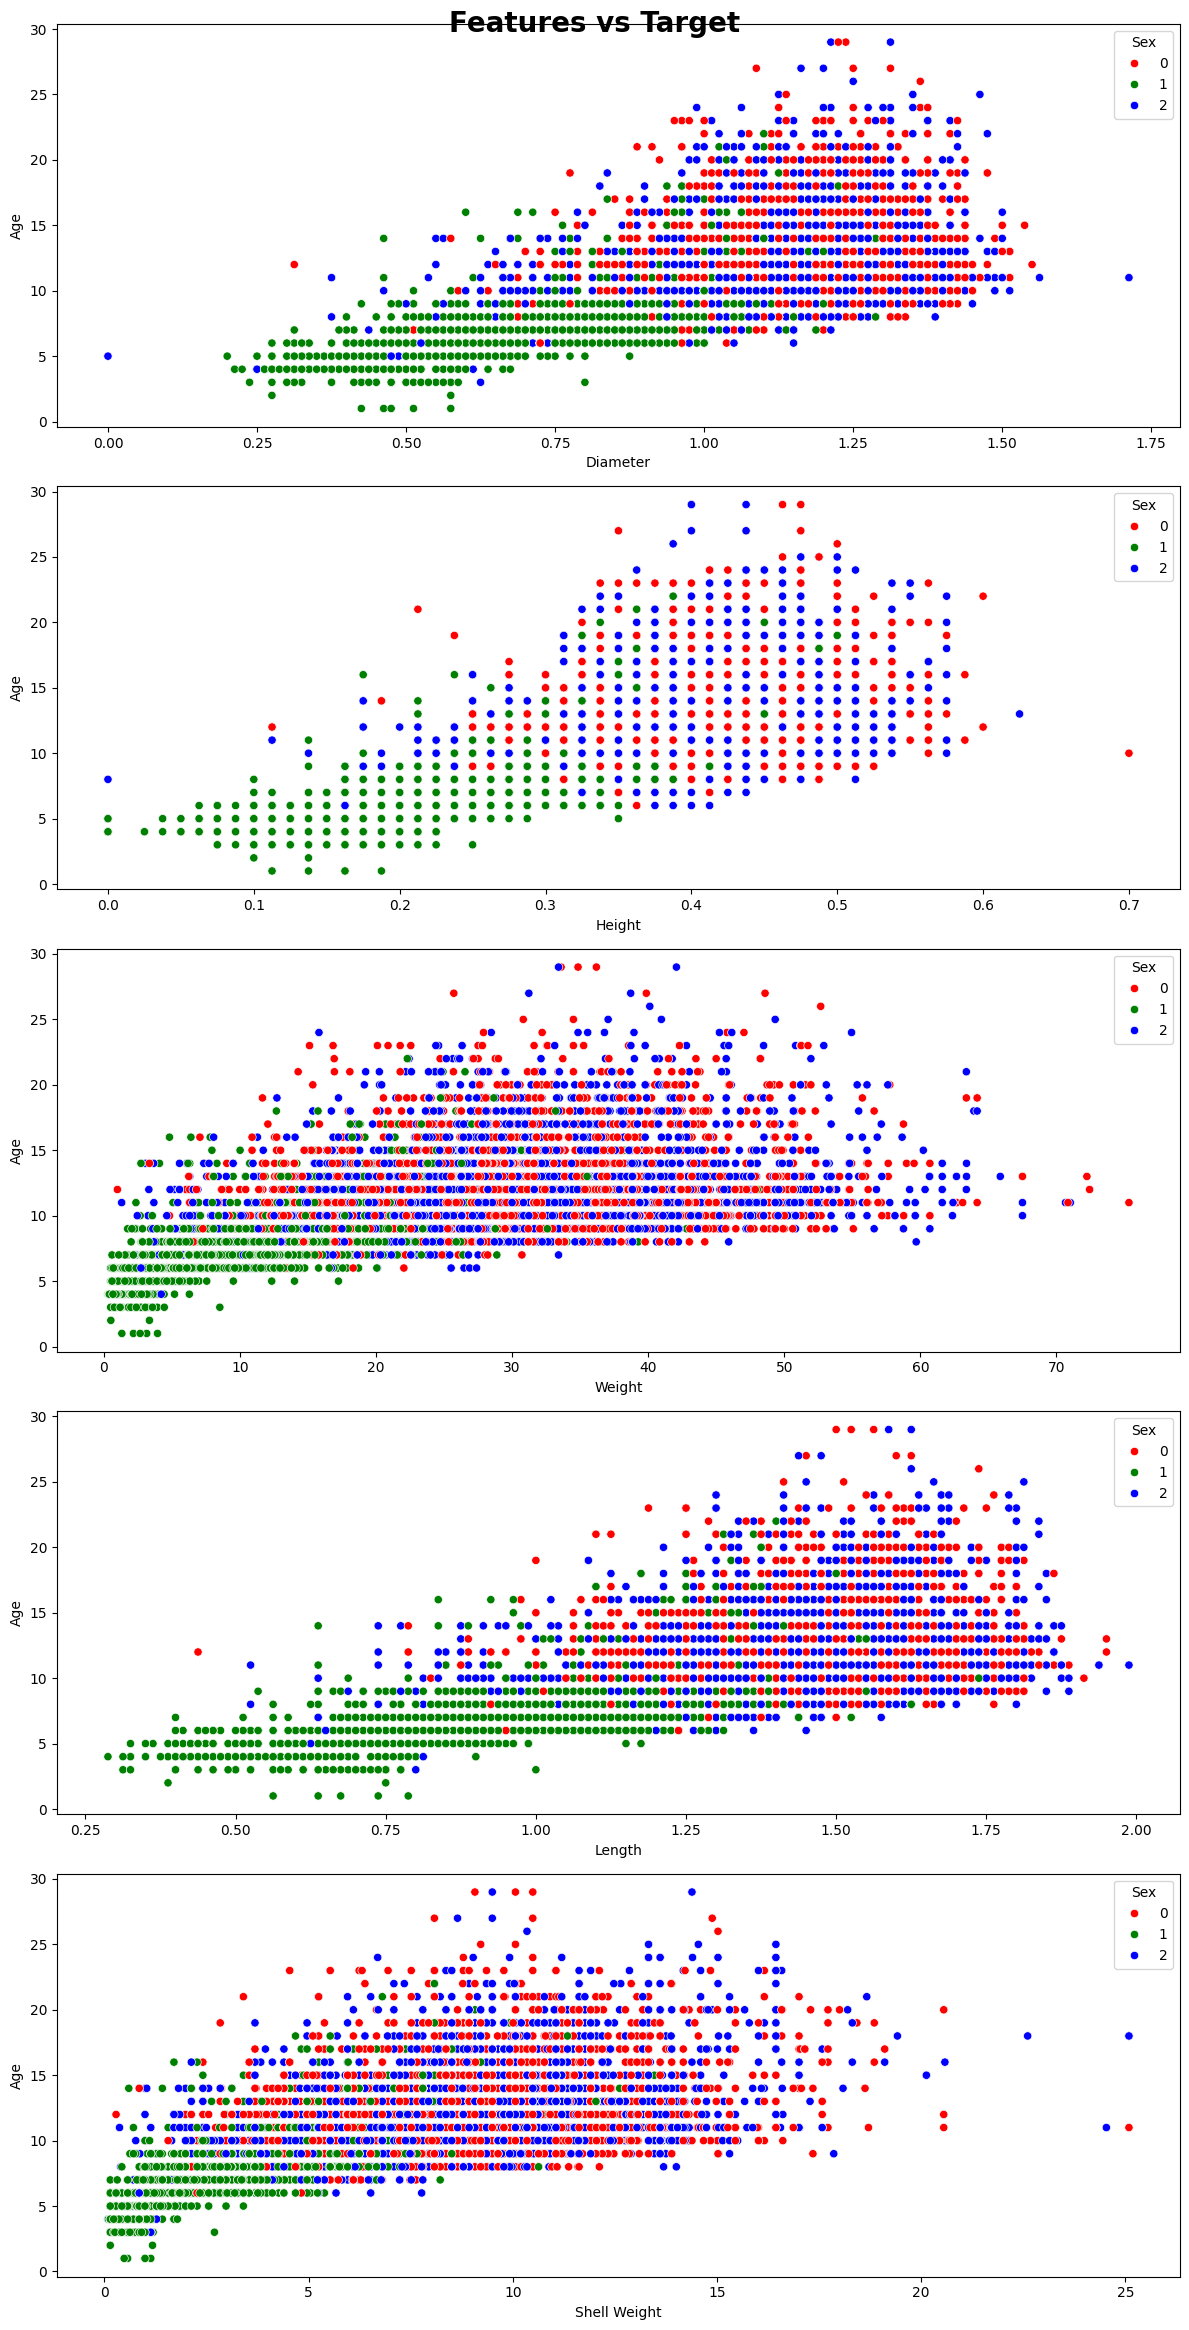

In [ ]:
features = ['Diameter', 'Height', 'Weight', 'Length', 'Shell Weight']

fig = plt.figure(figsize=(12, len(features) * 5))

for i in range(len(features)):
    ax = fig.add_subplot(len(features), 1, i+1)

    sns.scatterplot(data=df, x=features[i], y=df['Age'], hue=df['Sex'], ax=ax, palette=['r','g','b'])
    ax.set_xlabel(features[i])
    ax.set_ylabel('Age')

fig.suptitle(f'Features vs Target\n\n\n\n', ha='center', fontweight='bold', fontsize=20, y=0.93)
plt.tight_layout()
plt.show()

#1=immature, 0=female, 1=male

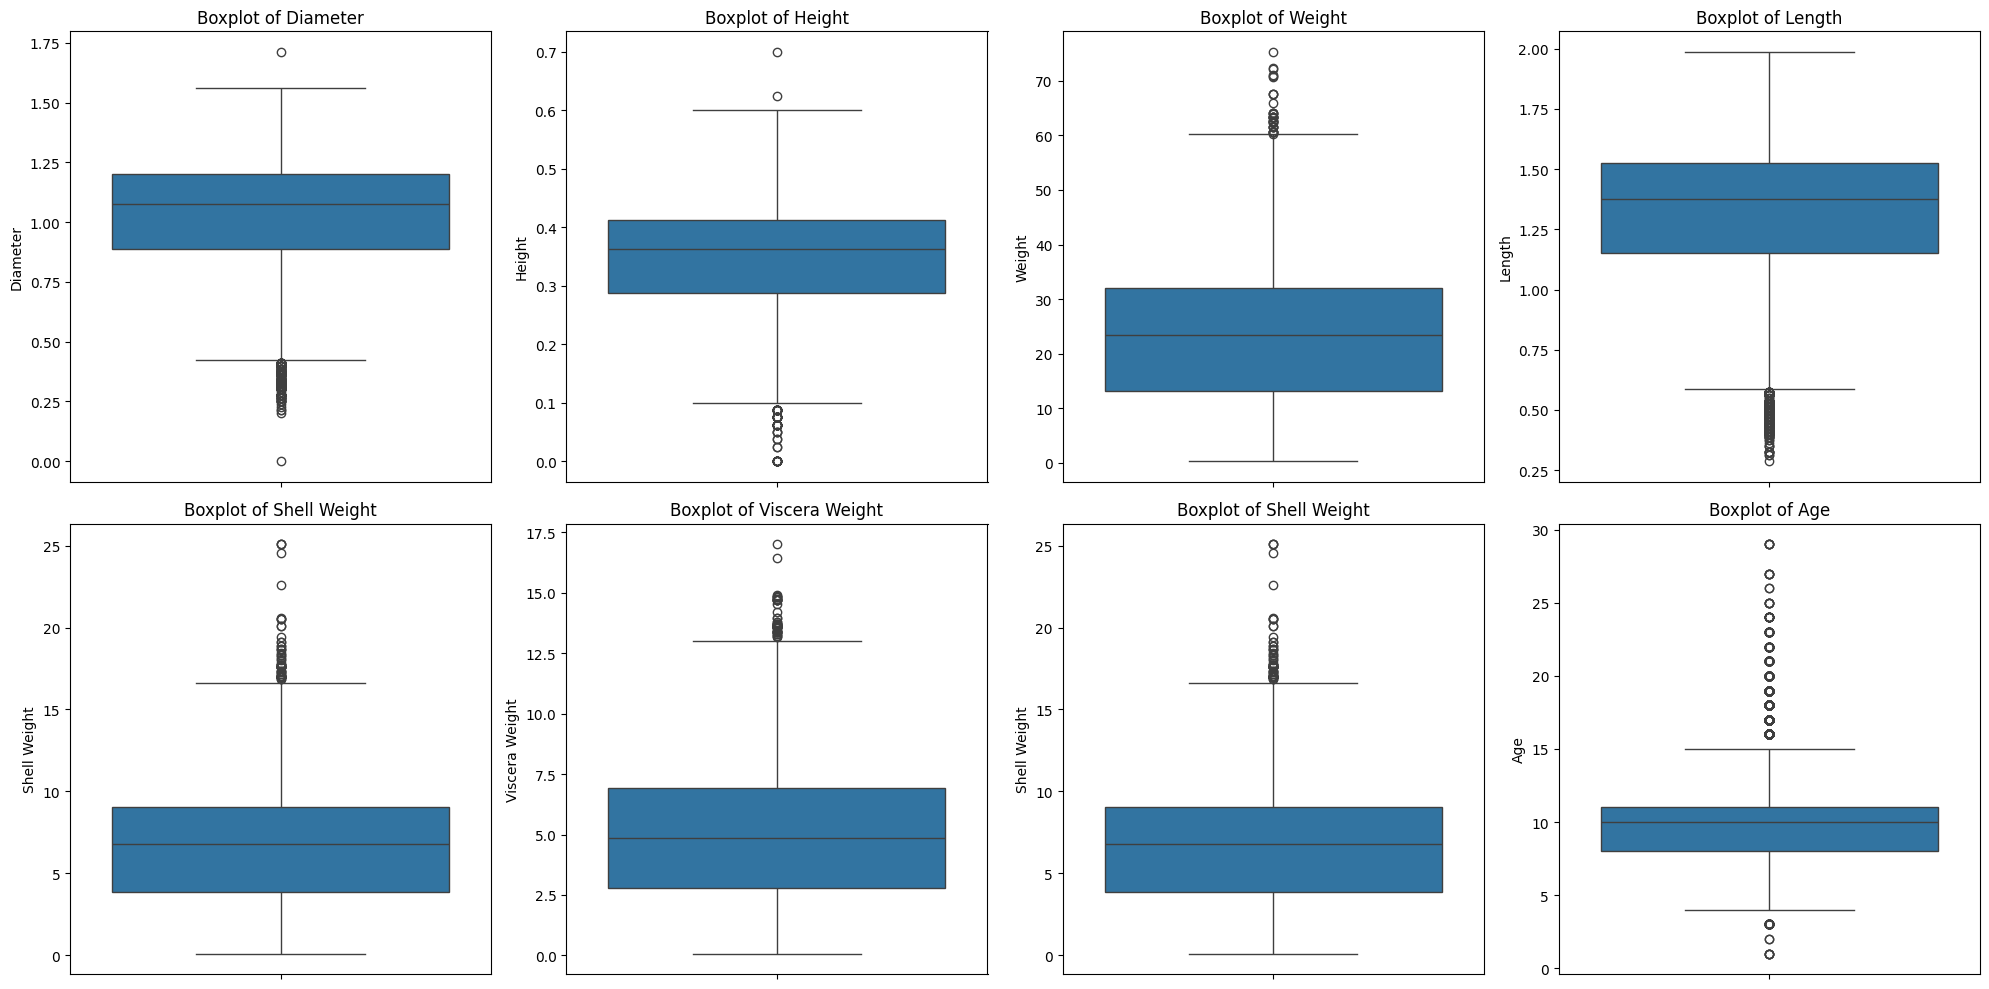

In [ ]:
features = ['Diameter', 'Height', 'Weight', 'Length', 'Shell Weight', 'Viscera Weight', 'Shell Weight', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(y=df[feature], ax=axes[i], orient='v')
    axes[i].set_title(f'Boxplot of {feature}')

for i in range(len(features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

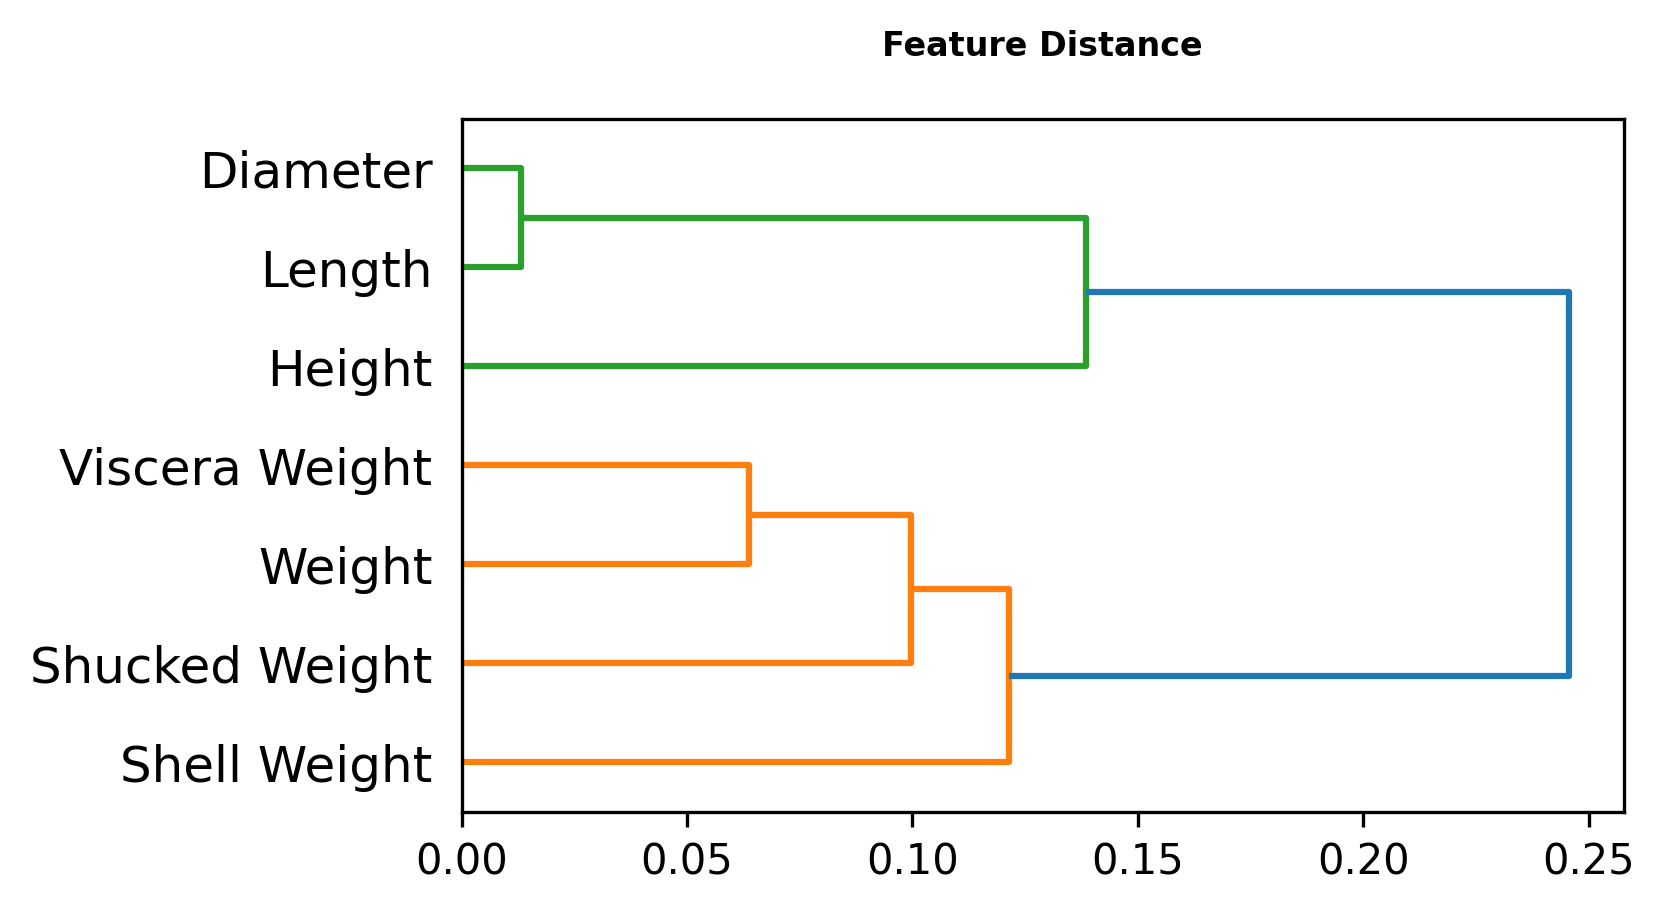

In [ ]:
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

distances = df[features].corr()
dist_linkage = ward(distances)

plt.figure(figsize = (5, 3), dpi = 300)
dendro = dendrogram(dist_linkage, labels=features, leaf_rotation=0, orientation='right')

plt.title(f'Feature Distance\n', weight = 'bold', size = 8)
plt.show()

In [ ]:
mutual_df = df[features]
y = df['Age']

mutual_info = mutual_info_regression(mutual_df, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["MI_score"] )

,MI_score
Shell Weight,0.584504
Height,0.539758
Diameter,0.523847
Weight,0.521783
Viscera Weight,0.510362
Length,0.506820
Shucked Weight,0.477494


# **Feature Engineering**

In [ ]:
df_copy = df.copy()
test_copy = test.copy()

def replace_zeros_with_min(df):
    for column in df.columns:
        if column == 'Sex':
            continue
        min_non_zero = df[column][df[column] > 0].min()

        if min_non_zero is not np.nan:
            df[column] = df[column].replace(0, min_non_zero)

replace_zeros_with_min(df_copy)
replace_zeros_with_min(test_copy)

# Apply feature engineering on the copied df
df_copy['water_loss'] = df_copy['Weight'] - df_copy['Viscera Weight'] - df_copy['Shucked Weight'] - df_copy['Shell Weight']
df_copy['shell_ratio'] = df_copy['Shell Weight'] / df_copy['Weight']
df_copy['viscera_ratio'] = df_copy['Viscera Weight'] / df_copy['Weight']
df_copy['shucked_ratio'] = df_copy['Shucked Weight'] / df_copy['Weight']
df_copy['volume'] = (4/3) * np.pi * (df_copy['Length'] / 2) * ((df_copy['Diameter'] + df_copy['Height']) / 4) ** 2
df_copy["crab_area"] = df_copy["Length"] * df_copy["Diameter"]
df_copy['approx_density'] = df_copy['Weight'] / (df_copy['crab_area'] * df_copy['Height'])
df_copy['bmi'] = df_copy['Weight'] / (df_copy['Height'] ** 2)

# Apply feature engineering on the copied test dataframe
test_copy['water_loss'] = test_copy['Weight'] - test_copy['Viscera Weight'] - test_copy['Shucked Weight'] - test_copy['Shell Weight']
test_copy['shell_ratio'] = test_copy['Shell Weight'] / test_copy['Weight']
test_copy['viscera_ratio'] = test_copy['Viscera Weight'] / test_copy['Weight']
test_copy['shucked_ratio'] = test_copy['Shucked Weight'] / test_copy['Weight']
test_copy['volume'] = (4/3) * np.pi * (test_copy['Length'] / 2) * ((test_copy['Diameter'] + test_copy['Height']) / 4) ** 2
test_copy["crab_area"] = test_copy["Length"] * test_copy["Diameter"]
test_copy['approx_density'] = test_copy['Weight'] / (test_copy['crab_area'] * test_copy['Height'])
test_copy['bmi'] = test_copy['Weight'] / (test_copy['Height'] ** 2)


df_copy.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,water_loss,shell_ratio,viscera_ratio,shucked_ratio,volume,crab_area,approx_density,bmi
0,1,1.2875,1.0750,0.3625,19.433582,8.306404,4.309124,6.662133,9.0,0.155922,0.342815,0.221736,0.427425,0.348258,1.384062,38.733715,147.889330
1,0,1.5500,1.2125,0.4250,33.877653,13.706983,6.676307,10.064072,14.0,3.430290,0.297071,0.197071,0.404603,0.544043,1.879375,42.414166,187.557938
2,2,1.3875,1.0625,0.3500,23.388337,9.993199,5.556502,5.811648,11.0,2.026989,0.248485,0.237576,0.427273,0.362367,1.474219,45.328294,190.925204
3,0,1.4375,1.1250,0.4375,27.499015,11.254751,5.329706,7.937860,22.0,2.976697,0.288660,0.193814,0.409278,0.459395,1.617188,38.866793,143.668323
4,2,1.5250,1.2250,0.4250,32.460178,13.919605,7.569317,8.788345,10.0,2.182912,0.270742,0.233188,0.428821,0.543471,1.868125,40.884249,179.710325


# **Models**

## **Linear regression models with regularization**

### Linear Model

In [ ]:
# Splitting the data
X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initializing the model - degree 1
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.4730783820880582
Mean Squared Error (MSE): 4.610814430475239
Root Mean Squared Error (RMSE): 2.1472807060268666


### Finding best Regression degree

In [ ]:
degrees = [1, 2, 3, 4, 5]
mae_scorer = make_scorer(mean_absolute_error)

best_degree = None
best_score = float('inf')
degrees_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split the data
    X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Scale the data using StanardScaler
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_val_poly = scaler.transform(X_val_poly)

    # Initialize the model
    model = LinearRegression()

    # Use cross-validation to evaluate the model with the current degree
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=mae_scorer)
    mean_score = np.mean(scores)
    degrees_scores.append(mean_score)

    print(f"Degree {degree}: Mean Cross-Validation Score = {mean_score}")

    # Update the best degree
    if mean_score < best_score:
        best_score = mean_score
        best_degree = degree

print(f"\nBest Degree: {best_degree} with a Mean Cross-Validation Score of {best_score}")

Degree 1: Mean Cross-Validation Score = 1.4552855269592182
Degree 2: Mean Cross-Validation Score = 1.3836712935014033
Degree 3: Mean Cross-Validation Score = 1.377148646528752
Degree 4: Mean Cross-Validation Score = 1.4669420069404286
Degree 5: Mean Cross-Validation Score = 2.1135999002107027

Best Degree: 3 with a Mean Cross-Validation Score of 1.377148646528752


### Applying regularization on regression model deg=3

In [ ]:
X = df.drop('Age', axis=1)
y = df['Age']

# Apply polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and validation sets
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_val_poly)

mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.4097322112163262


In [ ]:
lasso_cv = LassoCV(eps=0.1, n_alphas=100, cv=5)
lasso_cv.fit(X_train_poly, y_train)
y_pred_lasso = lasso_cv.predict(X_val_poly)

mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_val, y_pred_lasso)

print("LassoCV - Mean Absolute Error:", mae_lasso)

LassoCV - Mean Absolute Error: 1.6056678172259728


In [ ]:
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv.fit(X_train_poly, y_train)
y_pred_ridge = ridge_cv.predict(X_val_poly)

mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_val, y_pred_ridge)

print("RidgeCV - Mean Absolute Error:", mae_ridge)

RidgeCV - Mean Absolute Error: 1.402602726624115


In [ ]:
elastic_net_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], tol=0.01, max_iter=5000)
elastic_net_cv.fit(X_train_poly, y_train)
y_pred_elastic_net = elastic_net_cv.predict(X_val_poly)

mae_elastic_net = mean_absolute_error(y_val, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_val, y_pred_elastic_net)
rmse_elastic_net = root_mean_squared_error(y_val, y_pred_elastic_net)

print("ElasticNetCV - Mean Absolute Error:", mae_elastic_net)

ElasticNetCV - Mean Absolute Error: 1.421152073803386


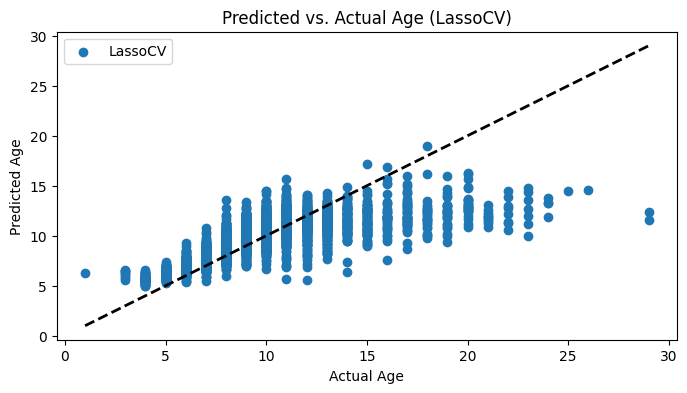

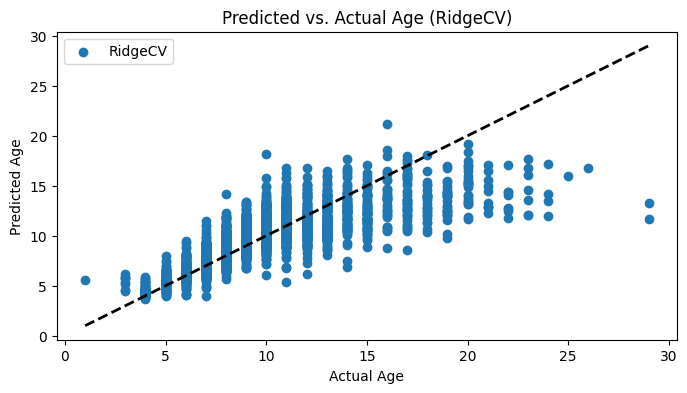

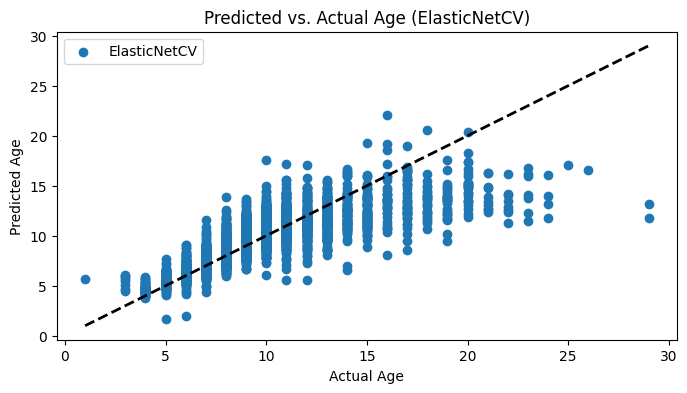

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_val, y_pred_lasso, label='LassoCV')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Predicted vs. Actual Age (LassoCV)")
plt.legend()
plt.show()


plt.figure(figsize=(8, 4))
plt.scatter(y_val, y_pred_ridge, label='RidgeCV')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Predicted vs. Actual Age (RidgeCV)")
plt.legend()
plt.show()


plt.figure(figsize=(8, 4))
plt.scatter(y_val, y_pred_elastic_net, label='ElasticNetCV')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Predicted vs. Actual Age (ElasticNetCV)")
plt.legend()
plt.show()

In [ ]:
data = {'Model': ['Ridge', 'Lasso', 'ElasticNet'],
        'Degree': [3, 3, 3],
        'MAE in Test-Kaggle': [1.37150, 1.617, 1.4]}
df_results = pd.DataFrame(data)
df_results

,Model,Degree,MAE in Test-Kaggle
0,Ridge,3,1.3715
1,Lasso,3,1.6170
2,ElasticNet,3,1.4000


### Ridge Regression - hyperparameter tuning

In [ ]:
X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial feature
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Scale the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# Hyperparameter tuning using RidgeCV with a range of alphas
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_poly, y_train)

# Make predictions on the validation data
y_val_pred = ridge_cv.predict(X_val_poly)
y_val_pred_int = np.round(y_val_pred).astype(int)

mae = mean_absolute_error(y_val, y_val_pred_int)
mae_cont = mean_absolute_error(y_val, y_val_pred)

print("Best Alpha:", ridge_cv.alpha_)
print("Mean Absolute Error on validation data with age as integer:", mae)
print("Mean Absolute Error on validation data with age as float:", mae_cont)

Best Alpha: 0.1
Mean Absolute Error on validation data with age as integer: 1.3716666666666666
Mean Absolute Error on validation data with age as float: 1.402602726598383


In [ ]:
data = {'Model': ['Ridge (pred as int)', 'Ridge (pred as float)'],
        'Degree': [3, 3],
        'Hyperparameter alpha': [0.1, 0.1],
        'MAE Kaggle': [1.359, 1.39496]
        }
df_results = pd.DataFrame(data)
df_results

,Model,Degree,Hyperparameter alpha,MAE Kaggle
0,Ridge (pred as int),3,0.1,1.35900
1,Ridge (pred as float),3,0.1,1.39496


### Ridge Regression - removing outliers

In [ ]:
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

# Remove outliers except 'Age'
def remove_outliers(df, feature_cols):
    df_clean = df.copy()
    for feature in feature_cols:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]

    return df_clean

data_cleaned = remove_outliers(df, features)

print("Original data shape:", df.shape)
print("Cleaned data shape:", data_cleaned.shape)

Original data shape: (15000, 9)
Cleaned data shape: (14504, 9)


In [ ]:
X_cleaned = data_cleaned.drop('Age', axis=1)
y_cleaned = data_cleaned['Age']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

#Apply polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Scale the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# Hyperparameter tuning using RidgeCV with a range of alphas
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_poly, y_train)

y_val_pred = ridge_cv.predict(X_val_poly)

y_val_pred_int = np.round(y_val_pred).astype(int)


mae = mean_absolute_error(y_val, y_val_pred_int)

print("Best Alpha:", ridge_cv.alpha_)
print("Mean Absolute Error on validation data:", mae)

Best Alpha: 0.1
Mean Absolute Error on validation data: 1.3664253705618752


In [ ]:
data = {'Submission': ['Submission 5', 'Submission 7'],
        'Model': ['Ridge', 'Ridge'],
        'Degree': [3, 3],
        'Hyperparameters alpha': ['0.1', '0.1'],
        'Outliers removed': ['No', 'Yes'],
        'MAE': [1.359, 1.41300]}
df_results = pd.DataFrame(data)
df_results

,Submission,Model,Degree,Hyperparameters alpha,Outliers removed,MAE
0,Submission 5,Ridge,3,0.1,No,1.359
1,Submission 7,Ridge,3,0.1,Yes,1.413


### Ridge Regression - feature extraction

In [ ]:
X = df.drop('Age', axis=1)
y = df['Age']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)


scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# Initialize variables to store best k and corresponding MAE
best_k = None
best_mae = float('inf')

# Loop over different values of k from 1 to 120
for k in range(1, 121):
    # Apply feature selection with current value of k
    selector = SelectKBest(f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_poly, y_train)
    X_val_selected = selector.transform(X_val_poly)

    ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
    ridge_cv.fit(X_train_selected, y_train)

    y_val_pred = ridge_cv.predict(X_val_selected)

    y_val_pred_int = np.round(y_val_pred).astype(int)

    mae = mean_absolute_error(y_val, y_val_pred_int)

    if mae < best_mae:
        best_mae = mae
        best_k = k

# Best k value
print(f"Best k: {best_k}, with MAE: {best_mae}")

# Use best k for transformation
selector = SelectKBest(f_regression, k=best_k)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_val_selected = selector.transform(X_val_poly)

# Perform RidgeCV using the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_selected, y_train)

# Make predictions
y_val_pred = ridge_cv.predict(X_val_selected)
y_val_pred_int = np.round(y_val_pred).astype(int)

# Final MAE
final_mae = mean_absolute_error(y_val, y_val_pred_int)
print(f"Final MAE with best k={best_k}: {final_mae}")
print("Predicted ages:", y_val_pred_int)

Best k: 100, with MAE: 1.383
Final MAE with best k=100: 1.383
Predicted ages: [10  8  8 ...  6  9 13]


### Ridge Regression - feature engineering

In [ ]:
X = df_copy.drop('Age', axis=1)
y = df_copy['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial feature
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Scale the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_val_poly = scaler.transform(X_val_poly)

# Hyperparameter tuning using RidgeCV with a range of alphas
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
ridge_cv.fit(X_train_poly, y_train)

y_val_pred = ridge_cv.predict(X_val_poly)
y_val_pred_int = np.round(y_val_pred).astype(int)

mae = mean_absolute_error(y_val, y_val_pred_int)

print("Best Alpha:", ridge_cv.alpha_)
print("Mean Absolute Error on validation data with age as integer:", mae)

Best Alpha: 100.0
Mean Absolute Error on validation data with age as integer: 1.3813333333333333


### Comparison of all models

In [ ]:
data = {
    'Model': ['Ridge', 'Ridge', 'Ridge', 'Ridge', 'Ridge'],
    'Degree': [3, 3, 3, 3, 3],
    'Hyperparameters tuning': [None, '0.1', '0.1', '0.1', '100'],
    'Data Preprocessing' : [None, None, 'Outliers removed', 'Feature extraction', 'Feature Engineering'],
    'MAE in test': [1.37150, 1.359, 1.41300, 1.37600, 1.38700]
}

df_results = pd.DataFrame(data)
df_results

,Model,Degree,Hyperparameters tuning,Data Preprocessing,MAE in test
0,Ridge,3,None,None,1.3715
1,Ridge,3,0.1,None,1.3590
2,Ridge,3,0.1,Outliers removed,1.4130
3,Ridge,3,0.1,Feature extraction,1.3760
4,Ridge,3,100,Feature Engineering,1.3870


Hence it was found, that while removing outliers can usually help make the model predict better, in our case they were vital in the training process and hence should not be removed. Even if feature extraction and outlier removal perform well on seen data, it was not the best on our test dataset

## **Advanced Models**

### Quantile Regressor

**Explanation of the model:**

Quantile regression is a statistical technique used to predict a specific quantile (e.g., the median or any other percentile) of the dependent variable, rather than just the mean, as in traditional linear regression. This method allows for a more comprehensive analysis of the distribution of the dependent variable by estimating its conditional quantiles given independent variables.

In quantile regression, the objective is to estimate the conditional quantile function Qy (τ∣X) for a given quantile τ, where τ∈(0,1). For instance, if τ=0.5, the goal is to predict the median, which divides the data in half. By choosing different values of (τ), quantile regression can model various parts of the distribution, such as the 10th, 25th, 50th, 75th, and 90th percentiles.

Unlike linear regression, which estimates the mean of the dependent variable and assumes a single central tendency, quantile regression provides insight into the entire distribution by predicting different quantiles. This flexibility enables a fuller understanding of data relationships, especially when the conditional distribution varies across different parts of the data.

Quantile regression relies on an asymmetric loss function, known as the quantile loss or pinball loss function. This loss function directs the optimization towards a quantile-specific solution by penalizing over-predictions and under-predictions differently based on the chosen quantile. As a result, quantile regression is robust to outliers and effectively captures the distributional effects of independent variables on the outcome, offering a nuanced analysis beyond the average trend.


**Choice for the model:**

Since our data main features are mostly skewed, quantile regression can provide insights into the effect of predictors across different points of the distribution (e.g., the lower or upper quantiles), offering a more complete picture than mean-based linear regression.

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

# LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

# Splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

# Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Model
quantile_model = QuantileRegressor(quantile=0.5, alpha=0)
quantile_model.fit(X_train_poly, y_train)

# Predictions
y_val_pred_quantile = quantile_model.predict(X_val_poly)
y_val_pred_quantile_int = np.round(y_val_pred_quantile).astype(int)

val_mae_quantile = mean_absolute_error(y_val, y_val_pred_quantile_int)
print(f"Validation MAE with Quantile Regression (quantile=0.5): {val_mae_quantile}")

y_test_pred_quantile = quantile_model.predict(X_test_poly)
y_test_pred_quantile_int = np.round(y_test_pred_quantile).astype(int)

Validation MAE with Quantile Regression (quantile=0.5): 1.3376666666666666


### RANSAC Regressor

**Explanation of the model:**

RANSAC is based on the idea of fitting a model to a dataset while identifying inliers (data points that fit the model well) and excluding outliers (data points that do not fit).
Instead of using all data points, RANSAC works by randomly sampling subsets of the data, assuming that some subsets will consist only of inliers
What RANSAC Does:
* Iterative Sampling: RANSAC repeatedly selects random subsets (using max_trials parameter) of the data points and fits a model to each subset.
* Evaluates the Fit: For each model, it checks which points in the entire dataset are "close enough" to the fitted model, marking them as inliers.
* Best Model Selection: After several iterations, RANSAC selects the model with the highest number of inliers as the best model.
* Refines the Model: A final model is often re-fitted using all identified inliers to improve accuracy.
* Objective: Instead of minimizing a sum of squared residuals like in linear regression, RANSAC maximizes the count of inliers.


**Choice for the model:**

Since our data contains outliers , we need to handle them RANSAC does this by excluding the outliers by choosing the subset with max number of inliers

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    #Handle unseen labels in the test set
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and train the RANSACRegressor
ransac_model = RANSACRegressor(LinearRegression(),
                               min_samples=0.6, # minimum number of samples for fitting
                               max_trials=200, # Maximum iterations
                               residual_threshold=1.0, # threshold for outlier removal
                               random_state=0)
ransac_model.fit(X_train_poly, y_train)


y_val_pred_ransac = ransac_model.predict(X_val_poly)
y_val_pred_ransac_int = np.round(y_val_pred_ransac).astype(int)


val_mae_ransac = mean_absolute_error(y_val, y_val_pred_ransac_int)
print(f"Validation MAE with ransac Regression (ransac=0.5): {val_mae_ransac}")


y_test_pred_ransac = ransac_model.predict(X_test_poly)
y_test_pred_ransac_int = np.round(y_test_pred_ransac).astype(int)

Validation MAE with ransac Regression (ransac=0.5): 1.3333333333333333


### Theil-Sen Regressor

**Explanation of the model:**

The TheilSenRegressor is a regression model that handles outliers well by using a method that extends the concept of the median to multiple dimensions. Here’s how it works:

1. Subset Sampling: The algorithm first selects smaller subsets of the data, each containing a specific number of samples, called n_subsamples. It calculates a least-squares regression (fitting a line) for each subset.

2. Choosing the Number of Subsets: The number of possible subsets can become extremely large because it’s based on the combinatorial "n choose k" formula (where you choose n_subsamples samples out of all available samples, n_samples). To avoid an unmanageable number of calculations, you can set a limit with max_subpopulation. If this limit is reached, the algorithm will start selecting subsets randomly.

3. Final Estimation Using the Spatial Median: After calculating least-squares solutions for these subsets, the algorithm computes the spatial median (also called the L1 median) of these solutions. This step combines all the solutions in a way that minimizes the impact of outliers, providing a final, robust estimate for the regression line.

This approach makes TheilSenRegressor highly robust to outliers, especially in lower-dimensional data.

**Choice for the model:**

Since our data doesn't have a lot of dimensions but it has outliers, We thought TheilSen would perform well.

In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Label encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])


df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)


X = df.drop('Age', axis=1)
y = df['Age']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Log transformation for skewed features
skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature].replace(-1, 0))
    X_val[feature] = np.log1p(X_val[feature].replace(-1, 0))
    test[feature] = np.log1p(test[feature].replace(-1, 0))

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the models
theil_sen = TheilSenRegressor(max_subpopulation=4500, n_subsamples=400, random_state=42)

# Fit TheilSenRegressor
theil_sen.fit(X_train_poly, y_train)

# Evaluate Theil-Sen model with cross-validation
scores = cross_val_score(theil_sen, X_train_poly, y_train, cv=5, scoring='neg_mean_absolute_error')

theil_sen_preds = theil_sen.predict(X_val_poly).round().astype(int)

mae = mean_absolute_error(y_val, theil_sen_preds)
print("Mean Absolute Error:", mae)
print(f"Best Cross-Validated MAE: {-scores.mean():.4f}")

Mean Absolute Error: 1.384
Best Cross-Validated MAE: 1.3853


In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Label encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Set threshold for z-score filtering
threshold = 3  # Define your threshold for outliers

# Combine datasets for z-score calculation
combined_data = pd.concat([X_train, X_val], axis=0)

# Calculate z-scores for combined data
z_scores_combined = zscore(combined_data, axis=0)

# Create a mask for filtering
mask = (z_scores_combined < threshold).all(axis=1)

# Split back into training and validation sets using the mask
X_train_filtered = combined_data.iloc[:len(X_train)][mask[:len(X_train)]]
y_train_filtered = y_train[mask[:len(X_train)]]
X_val_filtered = combined_data.iloc[len(X_train):][mask[len(X_train):]]
y_val_filtered = y_val[mask[len(X_train):]]

# Log transformation for skewed features
skewed_features = X_train_filtered.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train_filtered.columns[skewed_features]:
    X_train_filtered[feature] = np.log1p(X_train_filtered[feature].replace(-1, 0))
    X_val_filtered[feature] = np.log1p(X_val_filtered[feature].replace(-1, 0))
    test[feature] = np.log1p(test[feature].replace(-1, 0))

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_val_scaled = scaler.transform(X_val_filtered)
X_test_scaled = scaler.transform(test)

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize the models
theil_sen = TheilSenRegressor(max_subpopulation=4500, n_subsamples=400, random_state=42)

# Fit TheilSenRegressor
theil_sen.fit(X_train_poly, y_train_filtered)

scores = cross_val_score(theil_sen, X_train_poly, y_train_filtered, cv=5, scoring='neg_mean_absolute_error')

theil_sen_preds = theil_sen.predict(X_val_poly).round().astype(int)

teil_sen_pred_test = theil_sen.predict(X_test_poly).round().astype(int)

mae = mean_absolute_error(y_val_filtered, theil_sen_preds)
print("Mean Absolute Error:", mae)
print(f"Best Cross-Validated MAE: {-scores.mean():.4f}")

Mean Absolute Error: 1.3760913364674279
Best Cross-Validated MAE: 1.3752


### Huber Regressor

**Explanation of the model:**

The Huber Regressor is a robust approach to regression that reduces the influence of outliers in the data by combining aspects of ordinary least squares (OLS) and absolute deviation regression. The Huber loss function operates quadratically for small residuals and linearly for large ones, effectively blending the characteristics of mean squared error (MSE) and mean absolute error (MAE).

One of the advantages of the Huber loss is its ability to lessen the impact of outliers without entirely disregarding them. The parameter epsilon controls the threshold for classifying samples as outliers; smaller epsilon values increase the model's robustness against outliers.

The behavior of the Huber loss function changes based on the size of the residual \( r_i \):

- **Quadratic (MSE-like) for small residuals:** When \( |r_i| < δ \), the loss behaves quadratically, making the model more responsive to small errors and allowing it to closely fit the data in areas with low residuals, similar to MSE.
- **Linear (MAE-like) for large residuals:** When \( |r_i| > δ \), the loss becomes linear, reducing the penalty for larger residuals and thus limiting the influence of outliers, similar to MAE.

This dual behavior allows the Huber Regressor to handle outliers effectively while remaining sensitive to minor deviations in the data.

**Choice for the model:**

Since our data contains outliers that are vital to the model training, it is important that they are treated in a different way. Rather than penalizing them hard or ignoring them, they have to be predicted in a different way. The ability to switch from MSE-like loss function to MAE-like loss function makes this the perfect choice.

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    #Handle unseen labels in the test set
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)


# Initialize and train the huberRegressor
huber_model = HuberRegressor(epsilon=1.46, max_iter=10000, alpha=0.0001)
huber_model.fit(X_train_poly, y_train)

# Make predictions on the validation set
y_val_pred_huber = huber_model.predict(X_val_poly)
y_val_pred_huber_int = np.round(y_val_pred_huber).astype(int)

val_mae_huber = mean_absolute_error(y_val, y_val_pred_huber_int)
print(f"Validation MAE with huber Regression (huber=0.5): {val_mae_huber}")


y_test_pred_huber = huber_model.predict(X_test_poly)
y_test_pred_huber_int = np.round(y_test_pred_huber).astype(int)

Validation MAE with huber Regression (huber=0.5): 1.3046666666666666


Epsilon: 1.20, MAE: 1.3093333333333332

Epsilon: 1.21, MAE: 1.3113333333333332

Epsilon: 1.22, MAE: 1.3113333333333332

Epsilon: 1.23, MAE: 1.3086666666666666

Epsilon: 1.24, MAE: 1.3126666666666666

Epsilon: 1.25, MAE: 1.3093333333333332

Epsilon: 1.26, MAE: 1.312

Epsilon: 1.27, MAE: 1.3086666666666666

Epsilon: 1.28, MAE: 1.308

Epsilon: 1.29, MAE: 1.308



Epsilon: 1.30, MAE: 1.31

Epsilon: 1.31, MAE: 1.3073333333333332

Epsilon: 1.32, MAE: 1.3053333333333332

Epsilon: 1.33, MAE: 1.3066666666666666

Epsilon: 1.34, MAE: 1.3073333333333332

Epsilon: 1.35, MAE: 1.3086666666666666

Epsilon: 1.36, MAE: 1.3073333333333332

Epsilon: 1.37, MAE: 1.3073333333333332

Epsilon: 1.38, MAE: 1.3066666666666666

Epsilon: 1.39, MAE: 1.31

Epsilon: 1.40, MAE: 1.308



Epsilon: 1.40, MAE: 1.3066666666666666

Epsilon: 1.41, MAE: 1.3046666666666666

Epsilon: 1.42, MAE: 1.3086666666666666

Epsilon: 1.43, MAE: 1.3066666666666666

Epsilon: 1.44, MAE: 1.306

Epsilon: 1.45, MAE: 1.3073333333333332

Epsilon: 1.46, MAE: 1.3046666666666666

Epsilon: 1.47, MAE: 1.3066666666666666

Epsilon: 1.48, MAE: 1.3073333333333332

Epsilon: 1.49, MAE: 1.3066666666666666




Epsilon: 1.50, MAE: 1.3073333333333332

Epsilon: 1.51, MAE: 1.3106666666666666

Epsilon: 1.52, MAE: 1.308

Epsilon: 1.53, MAE: 1.3113333333333332

Epsilon: 1.54, MAE: 1.314

Epsilon: 1.55, MAE: 1.312

Epsilon: 1.56, MAE: 1.3153333333333332

Epsilon: 1.57, MAE: 1.3173333333333332

Epsilon: 1.58, MAE: 1.3166666666666667

Epsilon: 1.59, MAE: 1.3173333333333332

Epsilon: 1.60, MAE: 1.3186666666666667

Epsilon: 1.61, MAE: 1.3146666666666667



In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

# Preprocess the data
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and train the HuberRegressor
huber_model = HuberRegressor(epsilon=1.52, max_iter=50000, alpha=0.0001)
huber_model.fit(X_train_poly, y_train)

# Make predictions
y_val_pred = huber_model.predict(X_val_poly)
y_val_pred_int = np.round(y_val_pred).astype(int)

val_mae = mean_absolute_error(y_val, y_val_pred_int)
print(f"Validation MAE: {val_mae}")

y_test_pred = huber_model.predict(X_test_poly)
y_test_pred_int = np.round(y_test_pred).astype(int)

Validation MAE: 1.3126666666666666


Epsilon: 1.30, MAE: 1.306

Epsilon: 1.31, MAE: 1.3073333333333332

Epsilon: 1.32, MAE: 1.3073333333333332

Epsilon: 1.33, MAE: 1.312

Epsilon: 1.34, MAE: 1.306

Epsilon: 1.35, MAE: 1.3073333333333332

Epsilon: 1.36, MAE: 1.3073333333333332

Epsilon: 1.37, MAE: 1.3093333333333332

Epsilon: 1.38, MAE: 1.304

Epsilon: 1.39, MAE: 1.3126666666666666

Epsilon: 1.40, MAE: 1.302

Epsilon: 1.41, MAE: 1.312

Epsilon: 1.42, MAE: 1.3126666666666666


### Quantile & Huber Stacking

**Explanation of the model:**

Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

The estimators parameter corresponds to the list of the estimators which are stacked together in parallel on the input data.

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

from sklearn.linear_model import HuberRegressor

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

estimators = [
    ('quantile', QuantileRegressor(quantile=0.5, alpha=0)),
    ('huber', HuberRegressor(epsilon=1.32, max_iter=10000, alpha=0.0001))
]

# Initialize and train the stacking regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train_poly, y_train)


# Make predictions on the validation set
y_val_pred_stacking = stacking_model.predict(X_val_poly)
y_val_pred_stacking_int = np.round(y_val_pred_stacking).astype(int)

# Evaluate the model
val_mae_stacking = mean_absolute_error(y_val, y_val_pred_stacking_int)
print(f"Validation MAE with Stacking Regressor: {val_mae_stacking}")

y_test_pred_stacking = stacking_model.predict(X_test_poly)
y_test_pred_stacking_int = np.round(y_test_pred_stacking).astype(int)

Validation MAE with Stacking Regressor: 1.36


### Advanced Models summary

In [ ]:
data = {
    'Model': ['Quantile', 'RANSAC', 'Huber', 'Huber', 'Huber', 'Theil-Sen'],
    'Degree': [3, 3, 3, 3, 3, 2],
    'Hyperparameters': ['alpha = 0 (L1)', 'residual_threshold=1.0', 'eps=1.4, a=0001(L2)', 'eps=1.52, a=0001(L2)', 'eps=1.40, a=0001(L2)', 'max_subpopulation=4500, n_subsamples=400'],
    'Transformation': ['Log', 'Log', 'Log', 'Log', 'Log', 'Log, Z-Score'],
    'Scaler' : ['Standard', 'Standard', 'Standard', 'Robust', 'Robust', 'Standard'],
    'MAE test': [1.338, 1.3475, 1.32950, 1.32450, 1.33350, 1.37300]
}

df_results = pd.DataFrame(data)
df_results

,Model,Degree,Hyperparameters,Transformation,Scaler,MAE test
0,Quantile,3,alpha = 0 (L1),Log,Standard,1.3380
1,RANSAC,3,residual_threshold=1.0,Log,Standard,1.3475
2,Huber,3,"eps=1.4, a=0001(L2)",Log,Standard,1.3295
3,Huber,3,"eps=1.52, a=0001(L2)",Log,Robust,1.3245
4,Huber,3,"eps=1.40, a=0001(L2)",Log,Robust,1.3335
5,Theil-Sen,2,"max_subpopulation=4500, n_subsamples=400","Log, Z-Score",Standard,1.3730


# **Final Model choice and evaluation**

Final Choice: Huber Regressor, degree 3, Robust Scaler, Log Transformation, epsilon = 1.52

Best MAE on test set: 1.3245

# **Extra Approach - Advanced Models**

**Explanation:**

LightGBM (Light Gradient Boosting Machine) is a powerful machine learning algorithm designed to handle large datasets with speed and accuracy. It’s based on gradient boosting, which builds a series of decision trees one after another, with each tree improving on the errors of the previous one.

**Main Features:**

Gradient Boosting: Instead of building one big model, LightGBM builds several smaller models (decision trees), each improving upon the previous one. These models are “boosted” in sequence so that the overall model gradually gets better at predicting by focusing on what previous models got wrong.

Leaf-Wise Growth: Traditional tree-based models, like XGBoost, grow level-wise (adding levels to the whole tree at once). LightGBM, on the other hand, grows trees leaf-by-leaf, which makes it faster and often more accurate, especially on large datasets.


**Parameters:**

`objective:` Defines the purpose of the model, or what you want it to predict. MAE is used to minimize the MAE score

`learning_rate:` Controls how fast the model learns. A smaller learning rate (e.g., 0.01) means the model learns slowly but is less likely to overfit.
Higher learning rates (e.g., 0.1) speed up training but can lead to overfitting.

`n_estimators:` Number of trees to build. More trees give the model more chances to learn but increase training time.


`max_depth:` Maximum depth of each tree.

`num_leaves:` Maximum number of leaves per tree. Leaves represent the endpoints of a decision path. More leaves mean the model can capture more details, but it also risks overfitting

`reg_alpha `(L1 regularization) and `reg_lambda` (L2 regularization)

`subsample:` Fraction of data to use when building each tree.

`colsample_bytree:` Fraction of features to consider when building each tree.



**Why did we use it?**

Since LightGBM is a tree-based model, it is generally more robust to outliers than linear models. Trees split data into regions and make predictions based on averages within those regions, so extreme values in a small number of samples won’t drastically affect splits or predictions.
This means that, for many regression tasks, LightGBM can handle outliers reasonably well without a major negative impact on performance. It;s similar to how Quantile works in regression, but we do it using decision trees.



In [8]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    test[col] = label_encoder.transform(test[col])

df.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


skewed_features = X_train.apply(lambda x: np.abs(x.skew()) > 0.5)
for feature in X_train.columns[skewed_features]:
    X_train[feature] = np.log1p(X_train[feature])
    X_val[feature] = np.log1p(X_val[feature])
    test[feature] = np.log1p(test[feature])

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

lgb_md = LGBMRegressor(objective = 'mae',
                           n_estimators = 1000,
                           max_depth = 15,
                           learning_rate = 0.01,
                           num_leaves = 105,
                           reg_alpha = 8,
                           reg_lambda = 3,
                           subsample = 0.6,
                           colsample_bytree = 0.8,
                           random_state = 101).fit(X_train_scaled, y_train)

y_val_pred = lgb_md.predict(X_val_scaled)
y_val_pred_int = np.round(y_val_pred).astype(int)


val_mae = mean_absolute_error(y_val, y_val_pred_int)
print(f"Validation MAE: {val_mae}")

y_test_pred = lgb_md.predict(X_test_scaled)
y_test_pred_int = np.round(y_test_pred).astype(int)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 13500, number of used features: 8
[LightGBM] [Info] Start training from score 10.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**LightGBM Test score:** 1.31650